# 簡介 #

本章節和下一章節使用所謂的*非監督學習*算法。 非監督算法不使用目標； 相反，它們的目的是學習數據的某些屬性，以某種方式表示特徵的結構。 在用於預測文本任務的特徵工程中，可以將非監督算法視為“特徵發現”技術。

**聚類(Clutsring)** 只是意味著根據點彼此之間的相似程度將數據點分組。 可以說，聚類算法使“群雄逐鹿”。

當用於特徵工程時，我們可以嘗試發現代表一個細分市場的客戶群，或具有相似天氣模式的地理區域。 添加集群標籤的特徵可以幫助機器學習模型解開空間或鄰近度的複雜關係。

# 將聚合類標籤視為一類別 #

應用於單個實值特徵，聚類就像傳統的“分箱”或 [”離散化“](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html) 變換。 在多個特徵上，它就像“多維分箱”（有時稱為*矢量量化*）。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/sr3pdYI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>左:</strong> 單一特徵聚類 <strong>右:</strong> 兩個特徵聚類
</center></figcaption>
</figure>

添加到dataframe中，集群標籤的功能可能如下所示：

| Longitude | Latitude | Cluster |
|-----------|----------|---------|
| -93.619   | 42.054   | 3       |
| -93.619   | 42.053   | 3       |
| -93.638   | 42.060   | 1       |
| -93.602   | 41.988   | 0       |

重要的是要記住，這個“聚類”特徵是“類別屬性”。在這裡，它顯示了一個標籤編碼（即作為整數序列）作為典型的聚類算法將產生；根據您的型號，one-hot 編碼可能更合適。

添加聚類標籤的目的是，聚類會將特徵之間的複雜關係分解為更簡單的組。然後，我們的模型可以一個接一個地學習更簡單的組，而不必一次學習複雜的整體。這是一種“分而治之”的策略。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rraXFed.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>對 YearBuilt 功能進行聚類有助於此線性模型了解其與 SalePrice 的關係。
</center></figcaption>
</figure>

該圖顯示了聚類如何改進簡單的線性模型。 “YearBuilt”和“SalePrice”之間的曲線關係對於這種模型來說太複雜了——它*欠擬合(underfits)*。然而，在較小的塊上，這種關係*幾乎*是線性的，並且模型可以輕鬆學習。

# k-均值聚類(K-means clustering)

有很多聚類算法。它們的區別主要在於它們如何衡量“相似性”或“接近性”以及它們使用的特徵類型。我們將使用的算法 **k-means** 直觀且易於在特徵工程環境中應用。根據您的應用程序，另一種算法可能更合適。

**K 均值聚類** 使用普通直線距離（換句話說，歐幾里得距離）測量相似性。它通過在特徵空間內放置一些稱為**質心**的點來創建集群。數據集中的每個點都分配給它最接近的質心的集群。 “k-means”中的“k”是它創建的質心（即集群）的數量。您自己定義 k。

您可以想像每個質心通過一系列輻射圓來捕獲點。當來自競爭質心的圓組重疊時，它們形成一條線。結果就是所謂的 **Voronoi 鑲嵌(Voronoi tessallation)**。鑲嵌向您展示了未來數據將被分配到哪些集群；鑲嵌本質上是 k-means 從其訓練數據中學到的東西。

[*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 數據集上的聚類是 k-means 聚類。這是同一張圖，其中顯示了鑲嵌和質心。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/KSoLd3o.jpg.png" width=450, alt="">
<figcaption style="textalign: center; font-style: italic"><center>K-means 聚類創建特徵空間的 Voronoi 鑲嵌。
</center></figcaption>
</figure>

讓我們回顧一下 k-means 算法如何學習集群以及這對特徵工程意味著什麼。我們將關注 scikit-learn 實現中的三個參數：`n_clusters`、`max_iter` 和 `n_init`。

這是一個簡單的兩步過程。該算法首先隨機初始化一些預定義數量（`n_clusters`）的質心。然後迭代這兩個操作：
1. 將點分配到最近的質心(centroids)
2. 移動每個質心以最小化到其點的距離

它迭代這兩個步驟，直到質心不再移動，或者直到經過了最大迭代次數（`max_iter`）。

通常會發生質心的初始隨機位置以較差的聚類結果結束。出於這個原因，算法重複多次（`n_init`）並返回每個點與其質心之間具有最小總距離的聚類，即最佳聚類。

下面的動畫顯示了運行中的算法。它說明了結果對初始質心的依賴性以及迭代直到收斂的重要性。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/tBkCqXJ.gif" width=550, alt="">
<figcaption style="textalign: center; font-style: italic"><center>紐約 Airbnb 租賃的 K 均值聚類算法。
</center></figcaption>
</figure>

您可能需要為大量集群增加 `max_iter` 或為複雜數據集增加 `n_init`。通常，儘管您需要自己選擇的唯一參數是 `n_clusters`（即 k）。一組特徵的最佳分區取決於您使用的模型以及您嘗試預測的內容，因此最好像任何超參數一樣對其進行調整（例如通過交叉驗證）。

# 示例 - 加州住房 #

作為空間特徵，[*California Housing*](https://www.kaggle.com/camnugent/california-housing-prices) 的“緯度”和“經度”是 k-means 聚類的自然候選者.在此示例中，我們將這些與“MedInc”（收入中位數）聚類，以在加利福尼亞的不同地區創建經濟部門。

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("./data_set/housing.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


由於 **k-means 聚類對尺度敏感**，因此重新縮放(rescaled)或標準化(normalized)具有極值的數據可能是一個好主意。我們的特徵已經大致處於相同的尺度，因此我們將保持原樣。

In [4]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,3


現在讓我們看幾張圖，看看這有多有效。首先，一個散點圖，顯示了集群的地理分佈。似乎該算法為海岸上的高收入地區創建了單獨的細分。

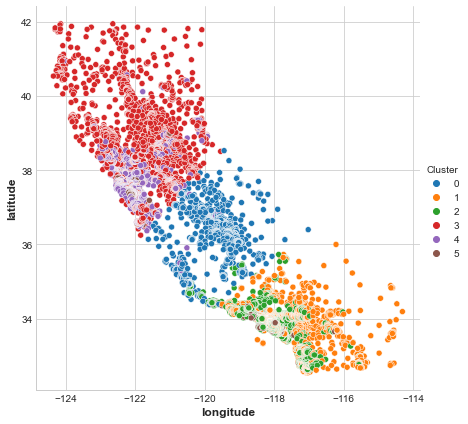

In [5]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

此數據集中的目標是 `MedHouseVal`（房屋值中位數）。這些箱線圖顯示了每個集群中目標的分佈。如果聚類信息豐富，則這些分佈在大多數情況下應該在 `MedHouseVal` 中分開，這確實是我們所看到的。

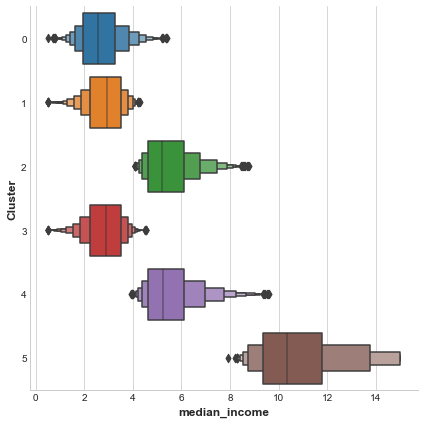

In [6]:
X["median_income"] = df["median_income"]
sns.catplot(x="median_income", y="Cluster", data=X, kind="boxen", height=6)